In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('preprocessed_data/preprocessed_train_data.csv')
val_data = pd.read_csv('preprocessed_data/preprocessed_val_data.csv')

print('Train:', train_data.shape)
print('Val:', val_data.shape)

Train: (190966, 18)
Val: (82192, 18)


In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_train = train_data.drop('demand_kW', axis=1)
y_train = train_data['demand_kW']
X_val = val_data.drop('demand_kW', axis=1)
y_val = val_data['demand_kW']

# Only train on the first 10k samples, otherwise out of memory
X_train = X_train[0:10000]
y_train = y_train[0:10000]

n_epochs = 500

n_input = X_train.shape[1]
n_hidden = n_input*10
n_out = 1
batch_size = 100
learning_rate = 1e-2
n_batch = 17

# Convert to tensors
X_train = torch.tensor(np.array(X_train))
y_train = torch.tensor(np.array(y_train))
X_val = torch.tensor(np.array(X_val))
y_val = torch.tensor(np.array(y_val))

print(X_train.size())
print(y_train.size())


torch.Size([10000, 17])
torch.Size([10000])


Define model

In [79]:
model = nn.Sequential(nn.Linear(n_input, n_input*5),
                      nn.ReLU(),
                      nn.Linear(n_input*5, n_input),
                      nn.ReLU(),
                      nn.BatchNorm1d(n_input),
                      nn.Linear(n_input, 17*2),
                      nn.ReLU(),
                      nn.BatchNorm1d(17*2),
                      nn.Linear(17*2, 17),
                      nn.ReLU(),
                      nn.BatchNorm1d(17),
                      nn.Linear(17, n_out),
                      nn.Sigmoid())
print(model)

# Simple FF NN model with ReLU and BatchNorm layers.

loss_function = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

Sequential(
  (0): Linear(in_features=17, out_features=85, bias=True)
  (1): ReLU()
  (2): Linear(in_features=85, out_features=17, bias=True)
  (3): ReLU()
  (4): BatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Linear(in_features=17, out_features=34, bias=True)
  (6): ReLU()
  (7): BatchNorm1d(34, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Linear(in_features=34, out_features=17, bias=True)
  (9): ReLU()
  (10): BatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Linear(in_features=17, out_features=1, bias=True)
  (12): Sigmoid()
)


Forward and backward pass


In [80]:
losses = []
for epoch in range(n_epochs):
    pred_y = model(X_train.float())
    loss = loss_function(pred_y, y_train.float())
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

c:\Users\freek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


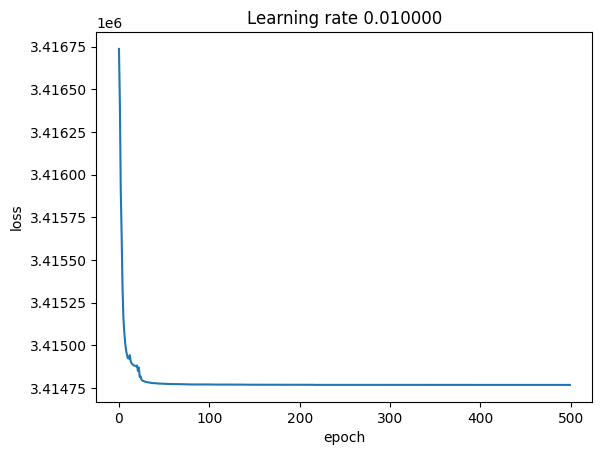

In [81]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [82]:
print('Training loss: ', losses[-1])

3414768.75


In [85]:
# Takes a long time:
pred_y = model(X_val.float())
loss = loss_function(pred_y, y_val.float())

c:\Users\freek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([82192])) that is different to the input size (torch.Size([82192, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(6613313., grad_fn=<MseLossBackward0>)


In [88]:
print('Validation error: ', loss.item())

Validation error:  6613313.0
